In [1]:
using DataArrays, DataFrames, Gadfly, Distributions, LinearLeastSquares, Grid

## Medición del punto de operación

Se utilizó un arreglo de centelladoras, llamado arreglo de coincidencias, con el cual se desea medir el punto de operación del sistema, y el rango de operación del mismo. 

In [8]:
# Medición del punto de operación del sistema

df = DataFrame()
df[:Voltaje] = [550, 570, 590, 610, 630, 650, 670, 690, 710, 
730, 750, 770, 790, 810, 830, 850]
df[:Medicion1] = [4,7,12,62,60,110,92,110,128,130,143,154,161,190,192,213]
df[:Medicion2] = [5,18,18,26,93,89,93,132,140,140,134,161,147,148,196,167]
df[:Medicion3] = [3,21,37,30,72,85,92,128,139,138,146,159,157,178,184,185]
df[:Medicion4] = [11,3,13,29,59,104,96,131,140,168,156,162,174,184,191,178]
df[:Medicion5] = [3,10,20,32,57,98,101,130,152,153,154,173,154,163,156,193]
df[:Promedio] = [(df[:Medicion1][1]+df[:Medicion2][1]+df[:Medicion3][1]+df[:Medicion4][1]+df[:Medicion5][1])/5,
    (df[:Medicion1][2]+df[:Medicion2][2]+df[:Medicion3][2]+df[:Medicion4][2]+df[:Medicion5][2])/5,
    (df[:Medicion1][3]+df[:Medicion2][3]+df[:Medicion3][3]+df[:Medicion4][3]+df[:Medicion5][3])/5,
    (df[:Medicion1][4]+df[:Medicion2][4]+df[:Medicion3][4]+df[:Medicion4][4]+df[:Medicion5][4])/5,
    (df[:Medicion1][5]+df[:Medicion2][5]+df[:Medicion3][5]+df[:Medicion4][5]+df[:Medicion5][5])/5,
    (df[:Medicion1][6]+df[:Medicion2][6]+df[:Medicion3][6]+df[:Medicion4][6]+df[:Medicion5][6])/5,
    (df[:Medicion1][7]+df[:Medicion2][7]+df[:Medicion3][7]+df[:Medicion4][7]+df[:Medicion5][7])/5,
    (df[:Medicion1][8]+df[:Medicion2][8]+df[:Medicion3][8]+df[:Medicion4][8]+df[:Medicion5][8])/5,
    (df[:Medicion1][9]+df[:Medicion2][9]+df[:Medicion3][9]+df[:Medicion4][9]+df[:Medicion5][9])/5,
    (df[:Medicion1][10]+df[:Medicion2][10]+df[:Medicion3][10]+df[:Medicion4][10]+df[:Medicion5][10])/5,
    (df[:Medicion1][11]+df[:Medicion2][11]+df[:Medicion3][11]+df[:Medicion4][11]+df[:Medicion5][11])/5,
    (df[:Medicion1][12]+df[:Medicion2][12]+df[:Medicion3][12]+df[:Medicion4][12]+df[:Medicion5][12])/5,
    (df[:Medicion1][13]+df[:Medicion2][13]+df[:Medicion3][13]+df[:Medicion4][13]+df[:Medicion5][13])/5,
    (df[:Medicion1][14]+df[:Medicion2][14]+df[:Medicion3][14]+df[:Medicion4][14]+df[:Medicion5][14])/5,
    (df[:Medicion1][15]+df[:Medicion2][15]+df[:Medicion3][15]+df[:Medicion4][15]+df[:Medicion5][15])/5,
    (df[:Medicion1][16]+df[:Medicion2][16]+df[:Medicion3][16]+df[:Medicion4][16]+df[:Medicion5][16])/5]
df[:Error] = [trunc(std([df[:Medicion1][1],df[:Medicion2][1],df[:Medicion3][1],df[:Medicion4][1],df[:Medicion5][1]]),1),
    trunc(std([df[:Medicion1][2],df[:Medicion2][2],df[:Medicion3][2],df[:Medicion4][2],df[:Medicion5][2]]),1),
    trunc(std([df[:Medicion1][3],df[:Medicion2][3],df[:Medicion3][3],df[:Medicion4][3],df[:Medicion5][3]]),1),
    trunc(std([df[:Medicion1][4],df[:Medicion2][4],df[:Medicion3][4],df[:Medicion4][4],df[:Medicion5][4]]),1),
    trunc(std([df[:Medicion1][5],df[:Medicion2][5],df[:Medicion3][5],df[:Medicion4][5],df[:Medicion5][5]]),1),
    trunc(std([df[:Medicion1][6],df[:Medicion2][6],df[:Medicion3][6],df[:Medicion4][6],df[:Medicion5][6]]),1),
    trunc(std([df[:Medicion1][7],df[:Medicion2][7],df[:Medicion3][7],df[:Medicion4][7],df[:Medicion5][7]]),1),
    trunc(std([df[:Medicion1][8],df[:Medicion2][8],df[:Medicion3][8],df[:Medicion4][8],df[:Medicion5][8]]),1),
    trunc(std([df[:Medicion1][9],df[:Medicion2][9],df[:Medicion3][9],df[:Medicion4][9],df[:Medicion5][9]]),1),
    trunc(std([df[:Medicion1][10],df[:Medicion2][10],df[:Medicion3][10],df[:Medicion4][10],df[:Medicion5][10]]),1),
    trunc(std([df[:Medicion1][11],df[:Medicion2][11],df[:Medicion3][11],df[:Medicion4][11],df[:Medicion5][11]]),1),
    trunc(std([df[:Medicion1][12],df[:Medicion2][12],df[:Medicion3][12],df[:Medicion4][12],df[:Medicion5][12]]),1),
    trunc(std([df[:Medicion1][13],df[:Medicion2][13],df[:Medicion3][13],df[:Medicion4][13],df[:Medicion5][13]]),1),
    trunc(std([df[:Medicion1][14],df[:Medicion2][14],df[:Medicion3][14],df[:Medicion4][14],df[:Medicion5][14]]),1),
    trunc(std([df[:Medicion1][15],df[:Medicion2][15],df[:Medicion3][15],df[:Medicion4][15],df[:Medicion5][15]]),1),
    trunc(std([df[:Medicion1][16],df[:Medicion2][16],df[:Medicion3][16],df[:Medicion4][16],df[:Medicion5][16]]),1)]
df


,Voltaje,Medicion1,Medicion2,Medicion3,Medicion4,Medicion5,Promedio,Error
1,550,4,5,3,11,3,5.2,3.3
2,570,7,18,21,3,10,11.8,7.5
3,590,12,18,37,13,20,20.0,10.0
4,610,62,26,30,29,32,35.8,14.8
5,630,60,93,72,59,57,68.2,15.0
6,650,110,89,85,104,98,97.2,10.3
7,670,92,93,92,96,101,94.8,3.8
8,690,110,132,128,131,130,126.2,9.1
9,710,128,140,139,140,152,139.8,8.4
10,730,130,140,138,168,153,145.8,14.9


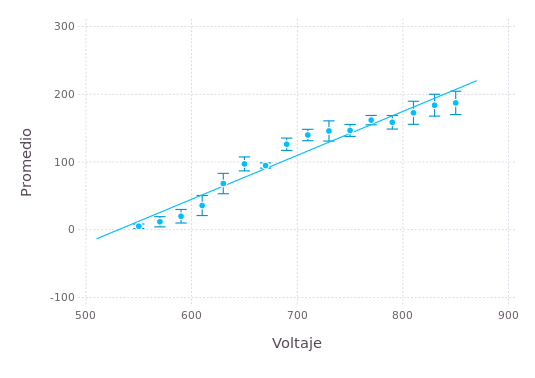

In [81]:
# Plot
#Gadfly
#plot(df, layer(x="Voltaje", y="Medicion1", Geom.point),layer(x="Voltaje", y="Medicion2", Geom.point))
#lower =  [1,2,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0]
#upper =  [1,1.2,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0]

ymins = df[:Promedio] .- df[:Error]
ymaxs = df[:Promedio] .+ df[:Error]


#draw(PDF("muones.png", 10inch, 10inch), plot(df,x="Voltaje",y="Promedio", ymin=ymins, ymax=ymaxs, Geom.point, Geom.errorbar))

# Regresión lineal

x_data = convert(Array,df[:Voltaje])
y_data = convert(Array,df[:Promedio])

t = [510; 870]

slope = Variable()
offset = Variable()
line = offset + x_data * slope
residuals = line - y_data
fit_error = sum_squares(residuals)
optval = minimize!(fit_error)


plot(layer(df,x="Voltaje",y="Promedio", ymin=ymins, ymax=ymaxs, Geom.point, Geom.errorbar),layer(x=t, y=evaluate(slope) * t + evaluate(offset), Geom.line))

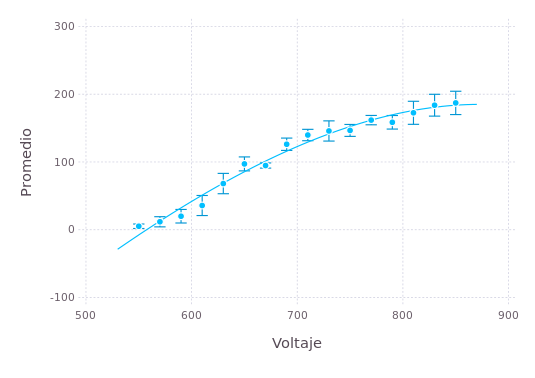

In [116]:
ymins = df[:Promedio] .- df[:Error]
ymaxs = df[:Promedio] .+ df[:Error]


#draw(PDF("muones.png", 10inch, 10inch), plot(df,x="Voltaje",y="Promedio", ymin=ymins, ymax=ymaxs, Geom.point, Geom.errorbar))

# Regresión cuadrática (por 2 XD)

x_data = convert(Array,df[:Voltaje])
y_data = convert(Array,df[:Promedio])

t = [510; 870]

t = reshape([530 : 0.1 : 870], length([530 : 0.1 : 870]), 1)
t_squared = t .^ 4

quadratic_coeff = Variable()
slope = Variable()
offset = Variable()
quadratic = offset + x_data * slope + quadratic_coeff * x_data .^ 4
residuals = quadratic - y_data
fit_error = sum_squares(residuals)
optval = minimize!(fit_error)

plot(layer(df,x="Voltaje",y="Promedio", ymin=ymins, ymax=ymaxs, Geom.point, Geom.errorbar),layer(x=t, y=evaluate(offset) + t * evaluate(slope) + t_squared * evaluate(quadratic_coeff), Geom.line))

In [9]:
writetable("datosMuones.csv", df, separator = ',', header = true)

Haremos dos mediciones por cada voltaje para validar algunos arreglos que se hicieron en el sistema.

In [44]:
# Mediciones de calibración para el sistema

df2 = DataFrame()
df2[:Voltaje] = [650, 670, 690, 710,730, 750, 770, 790,810,830,850]
df2[:Medicion1] = [90,133,135,131,153,148,139,143,144,178,180]
df2[:Medicion2] = [89,113,138,131,142,139,146,148,140,166,195]
df2[:Promedio] = [(df2[:Medicion1][1]+df2[:Medicion2][1])/2,
    (df2[:Medicion1][2]+df2[:Medicion2][2])/2,
    (df2[:Medicion1][3]+df2[:Medicion2][3])/2,
    (df2[:Medicion1][4]+df2[:Medicion2][4])/2,
    (df2[:Medicion1][5]+df2[:Medicion2][5])/2,
    (df2[:Medicion1][6]+df2[:Medicion2][6])/2,
    (df2[:Medicion1][7]+df2[:Medicion2][7])/2,
    (df2[:Medicion1][8]+df2[:Medicion2][8])/2,
    (df2[:Medicion1][9]+df2[:Medicion2][9])/2,
    (df2[:Medicion1][10]+df2[:Medicion2][10])/2,
    (df2[:Medicion1][11]+df2[:Medicion2][11])/2]
df2[:Error] = [trunc(std([df2[:Medicion1][1],df2[:Medicion2][1]]),1),
    trunc(std([df2[:Medicion1][2],df2[:Medicion2][2]]),1),
    trunc(std([df2[:Medicion1][3],df2[:Medicion2][3]]),1),
    trunc(std([df2[:Medicion1][4],df2[:Medicion2][4]]),1),
    trunc(std([df2[:Medicion1][5],df2[:Medicion2][5]]),1),
    trunc(std([df2[:Medicion1][6],df2[:Medicion2][6]]),1),
    trunc(std([df2[:Medicion1][7],df2[:Medicion2][7]]),1),
    trunc(std([df2[:Medicion1][8],df2[:Medicion2][8]]),1),
    trunc(std([df2[:Medicion1][9],df2[:Medicion2][9]]),1),
    trunc(std([df2[:Medicion1][10],df2[:Medicion2][10]]),1),
    trunc(std([df2[:Medicion1][11],df2[:Medicion2][11]]),1)]
df2


,Voltaje,Medicion1,Medicion2,Promedio,Error
1,650,90,89,89.5,0.7
2,670,133,113,123.0,14.1
3,690,135,138,136.5,2.1
4,710,131,131,131.0,0.0
5,730,153,142,147.5,7.7
6,750,148,139,143.5,6.3
7,770,139,146,142.5,4.9
8,790,143,148,145.5,3.5
9,810,144,140,142.0,2.8
10,830,178,166,172.0,8.4


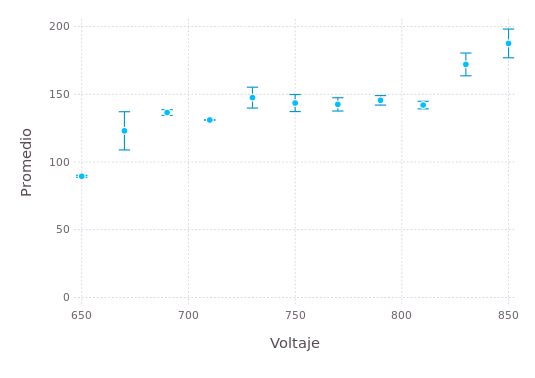

In [45]:
ymins2 = df2[:Promedio] .- df2[:Error]
ymaxs2 = df2[:Promedio] .+ df2[:Error]


#draw(PDF("muones.png", 10inch, 10inch), plot(df,x="Voltaje",y="Promedio", ymin=ymins, ymax=ymaxs, Geom.point, Geom.errorbar))

# Regresión cuadrática (por 2 XD)

x_data2 = convert(Array,df2[:Voltaje])
y_data2 = convert(Array,df2[:Promedio])

t2 = [630; 830]

t2 = reshape([630 : 0.1 : 850], length([630 : 0.1 : 850]), 1)
t_squared2 = t2 .^ 2

quadratic_coeff = Variable()
slope = Variable()
offset = Variable()
quadratic = offset + x_data2 * slope + quadratic_coeff * x_data2 .^ 2
residuals = quadratic - y_data2
fit_error = sum_squares(residuals)
optval = minimize!(fit_error)

#plot(layer(df2,x="Voltaje",y="Promedio", ymin=ymins2, ymax=ymaxs2, Geom.point, Geom.errorbar),layer(x=t2, y=evaluate(offset) + t2 * evaluate(slope) + t_squared2 * evaluate(quadratic_coeff), Geom.line))
plot(layer(df2,x="Voltaje",y="Promedio", ymin=ymins2, ymax=ymaxs2, Geom.point, Geom.errorbar))


In [49]:
# Añadiedo más puntos en el plató

df2 = DataFrame()
df2[:Voltaje] = [650, 670, 690, 710,730, 750, 770, 790,810,830,850]
df2[:Medicion1] = [90,133,135,131,153,148,139,143,144,178,180]
df2[:Medicion2] = [89,113,138,131,142,139,146,148,140,166,195]
df2[:Promedio] = [(df2[:Medicion1][1]+df2[:Medicion2][1])/2,
    (df2[:Medicion1][2]+df2[:Medicion2][2])/2,
    (df2[:Medicion1][3]+df2[:Medicion2][3])/2,
    (df2[:Medicion1][4]+df2[:Medicion2][4])/2,
    (df2[:Medicion1][5]+df2[:Medicion2][5])/2,
    (df2[:Medicion1][6]+df2[:Medicion2][6])/2,
    (df2[:Medicion1][7]+df2[:Medicion2][7])/2,
    (df2[:Medicion1][8]+df2[:Medicion2][8])/2,
    (df2[:Medicion1][9]+df2[:Medicion2][9])/2,
    (df2[:Medicion1][10]+df2[:Medicion2][10])/2,
    (df2[:Medicion1][11]+df2[:Medicion2][11])/2]
df2[:Error] = [trunc(std([df2[:Medicion1][1],df2[:Medicion2][1]]),1),
    trunc(std([df2[:Medicion1][2],df2[:Medicion2][2]]),1),
    trunc(std([df2[:Medicion1][3],df2[:Medicion2][3]]),1),
    trunc(std([df2[:Medicion1][4],df2[:Medicion2][4]]),1),
    trunc(std([df2[:Medicion1][5],df2[:Medicion2][5]]),1),
    trunc(std([df2[:Medicion1][6],df2[:Medicion2][6]]),1),
    trunc(std([df2[:Medicion1][7],df2[:Medicion2][7]]),1),
    trunc(std([df2[:Medicion1][8],df2[:Medicion2][8]]),1),
    trunc(std([df2[:Medicion1][9],df2[:Medicion2][9]]),1),
    trunc(std([df2[:Medicion1][10],df2[:Medicion2][10]]),1),
    trunc(std([df2[:Medicion1][11],df2[:Medicion2][11]]),1)]


df2[:Promedio][4] = 1
df2[:Promedio][4] = 1

df2

,Voltaje,Medicion1,Medicion2,Promedio,Error
1,650,90,89,89.5,0.7
2,670,133,113,123.0,14.1
3,690,135,138,136.5,2.1
4,710,131,131,131.0,0.0
5,730,153,142,147.5,7.7
6,750,148,139,143.5,6.3
7,770,139,146,142.5,4.9
8,790,143,148,145.5,3.5
9,810,144,140,142.0,2.8
10,830,178,166,172.0,8.4
